In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import tensorflow as tf
import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

Using TensorFlow backend.


ImportError: cannot import name 'tokenizer_from_json'

In [10]:
df = pd.read_csv("gangnam_price.csv", encoding = "cp949")
df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,202006,23,"149,500",4,1988,언주로 103,NaN
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,202006,18,"162,750",4,1987,언주로 3,NaN
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,202006,20,"160,000",5,1987,언주로 3,NaN
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,202006,22,"150,000",2,1987,언주로 3,NaN
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,67.28,202006,25,"165,000",2,1987,언주로 3,20200916.0


In [11]:
df[df["계약년월"] == 202009]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
17,서울특별시 강남구 개포동,652,652,0,개포우성3차,104.430,202009,29,"210,000",14,1984,개포로 307,NaN
60,서울특별시 강남구 개포동,187,187,0,개포주공 5단지,83.170,202009,1,"230,000",14,1983,삼성로4길 17,NaN
61,서울특별시 강남구 개포동,187,187,0,개포주공 5단지,53.980,202009,2,"184,000",8,1983,삼성로4길 17,NaN
62,서울특별시 강남구 개포동,187,187,0,개포주공 5단지,53.980,202009,5,"184,000",7,1983,삼성로4길 17,NaN
63,서울특별시 강남구 개포동,187,187,0,개포주공 5단지,83.170,202009,9,"230,000",14,1983,삼성로4길 17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,서울특별시 강남구 청담동,134-38,134,38,청담자이,49.593,202009,12,"175,000",10,2011,영동대로138길 12,NaN
4095,서울특별시 강남구 청담동,102-1,102,1,청담파라곤Ⅱ 1단지,198.810,202009,7,"342,000",4,2010,압구정로71길 32,NaN
4098,서울특별시 강남구 청담동,127-31,127,31,청담현대3차아파트,109.530,202009,14,"216,000",7,1999,도산대로101길 29,NaN
4104,서울특별시 강남구 청담동,23,23,0,현대아파트,84.760,202009,11,"160,000",5,1988,선릉로 748,20201019.0


### 계약시기 변수 추가

In [12]:
a = df["계약년월"].values
a

array([202006, 202006, 202006, ..., 202011, 202012, 202103], dtype=int64)

In [13]:
b = df["계약일"].values
b

array([23, 18, 20, ..., 26,  5, 20], dtype=int64)

In [14]:
date = []
for i in range(len(a)):
    date.append(str(a[i])[:4] + '-' + str(a[i])[4:] + '-' + str(b[i]))
date

['2020-06-23',
 '2020-06-18',
 '2020-06-20',
 '2020-06-22',
 '2020-06-25',
 '2020-06-25',
 '2020-06-25',
 '2020-06-25',
 '2020-07-11',
 '2020-08-25',
 '2020-12-4',
 '2020-12-28',
 '2020-12-23',
 '2020-06-8',
 '2020-06-9',
 '2020-07-6',
 '2020-07-7',
 '2020-09-29',
 '2020-11-8',
 '2020-11-24',
 '2020-12-20',
 '2020-12-21',
 '2021-01-5',
 '2021-01-5',
 '2021-01-11',
 '2021-01-25',
 '2021-02-9',
 '2020-08-1',
 '2020-10-14',
 '2020-11-18',
 '2020-11-18',
 '2021-01-13',
 '2021-01-21',
 '2021-01-30',
 '2020-04-4',
 '2020-04-13',
 '2020-04-13',
 '2020-04-16',
 '2020-04-17',
 '2020-05-5',
 '2020-05-16',
 '2020-05-23',
 '2020-06-4',
 '2020-06-5',
 '2020-06-9',
 '2020-07-7',
 '2020-07-11',
 '2020-07-21',
 '2020-07-24',
 '2020-07-29',
 '2020-08-1',
 '2020-08-8',
 '2020-08-11',
 '2020-08-12',
 '2020-08-15',
 '2020-08-15',
 '2020-08-18',
 '2020-08-20',
 '2020-08-26',
 '2020-08-28',
 '2020-09-1',
 '2020-09-2',
 '2020-09-5',
 '2020-09-9',
 '2020-09-16',
 '2020-10-13',
 '2020-10-21',
 '2020-11-1',
 '2

In [15]:
df["계약시기"] = date
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,계약시기
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.750,202006,23,"149,500",4,1988,언주로 103,NaN,2020-06-23
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,18,"162,750",4,1987,언주로 3,NaN,2020-06-18
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,20,"160,000",5,1987,언주로 3,NaN,2020-06-20
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,22,"150,000",2,1987,언주로 3,NaN,2020-06-22
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,67.280,202006,25,"165,000",2,1987,언주로 3,20200916.0,2020-06-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,서울특별시 강남구 청담동,106,106,0,현대한강빌라,136.260,202004,17,"185,000",3,1992,도산대로85길 56,NaN,2020-04-17
4107,서울특별시 강남구 청담동,115-17,115,17,호원빌라,244.490,202102,6,"380,000",2,1999,압구정로75길 15,NaN,2021-02-6
4108,서울특별시 강남구 청담동,101,101,0,효성빌라 청담101(A동),226.740,202011,26,"620,000",5,2019,압구정로71길 28,NaN,2020-11-26
4109,서울특별시 강남구 청담동,5-25,5,25,휴먼스타빌,39.950,202012,5,"75,000",9,2005,도산대로 454,NaN,2020-12-5


#### 거래금액 "," 제거 후 data type int형으로 변환

In [16]:
df = df.replace(',','', regex=True)

In [17]:
a = pd.to_numeric(df["거래금액(만원)"])

In [18]:
df["price"] = a
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,계약시기,price
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.750,202006,23,149500,4,1988,언주로 103,NaN,2020-06-23,149500
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,18,162750,4,1987,언주로 3,NaN,2020-06-18,162750
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,20,160000,5,1987,언주로 3,NaN,2020-06-20,160000
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.970,202006,22,150000,2,1987,언주로 3,NaN,2020-06-22,150000
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,67.280,202006,25,165000,2,1987,언주로 3,20200916.0,2020-06-25,165000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,서울특별시 강남구 청담동,106,106,0,현대한강빌라,136.260,202004,17,185000,3,1992,도산대로85길 56,NaN,2020-04-17,185000
4107,서울특별시 강남구 청담동,115-17,115,17,호원빌라,244.490,202102,6,380000,2,1999,압구정로75길 15,NaN,2021-02-6,380000
4108,서울특별시 강남구 청담동,101,101,0,효성빌라 청담101(A동),226.740,202011,26,620000,5,2019,압구정로71길 28,NaN,2020-11-26,620000
4109,서울특별시 강남구 청담동,5-25,5,25,휴먼스타빌,39.950,202012,5,75000,9,2005,도산대로 454,NaN,2020-12-5,75000


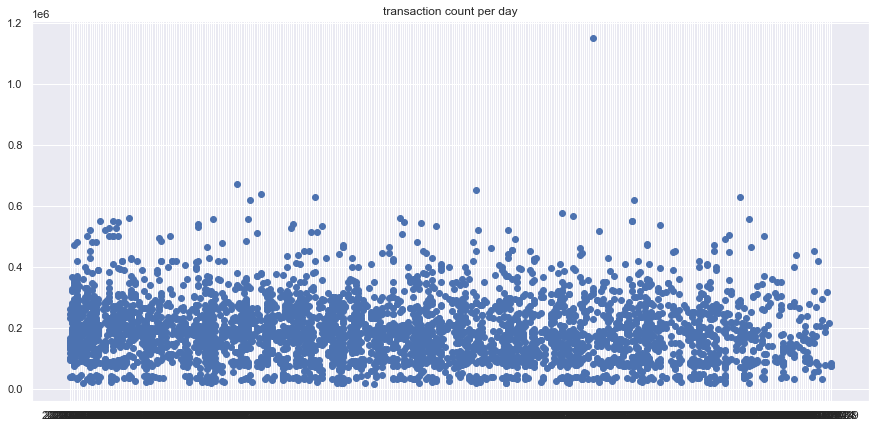

In [22]:
plt.figure(figsize=(15, 7))
plt.scatter(df["계약시기"], df["price"].values)
plt.title('transaction count per day')

plt.show()

## 시간에 따른 부동산 거래 발생 횟수

In [ ]:
df1.index = df1['계약시기'] # 이런 것도 있다
df1.set_index('계약시기', inplace=True)
df1

In [132]:
df_day_1 = pd.DataFrame(df.groupby("계약시기").count()["price"])
df_day_1 = df_day_1.rename(columns = {"price"})
# 시간에 따른 부동산 거래 발생 횟수: "count"

df_day_1

,count
계약시기,
2020-03-31,3
2020-04-1,7
2020-04-10,4
2020-04-11,6
2020-04-13,11
...,...
2021-03-5,7
2021-03-6,8
2021-03-7,3


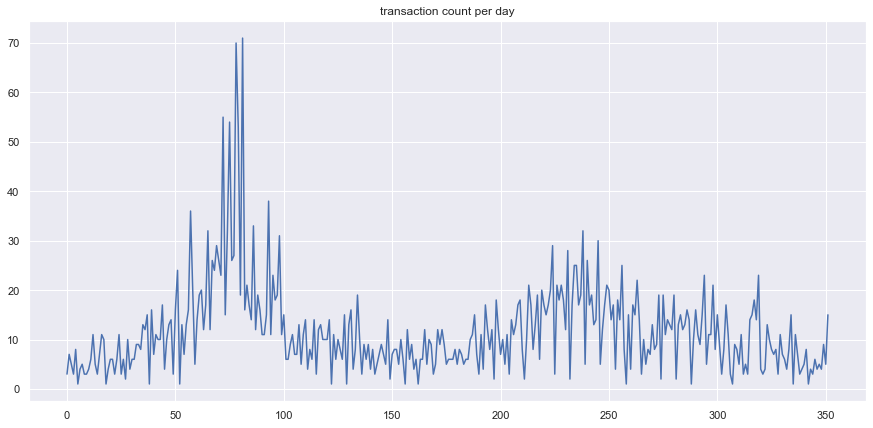

In [13]:
plt.figure(figsize=(15, 7))
plt.plot(df_day["시군구"].values)
plt.title('transaction count per day')

plt.show()

In [280]:
df_1 = df_day_1[:-5]

,count
계약시기,
2020-03-31,3
2020-04-1,7
2020-04-10,4
2020-04-11,6
2020-04-13,11
...,...
2021-03-29,9
2021-03-3,10
2021-03-30,5


In [283]:
df_1_test = df_day_1[-5:]
df_1_test

,count
계약시기,
2021-03-5,7
2021-03-6,8
2021-03-7,3
2021-03-8,11
2021-03-9,7


## 연습

In [275]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [278]:
model = ARIMA(df_day_1["count"].values, order=(2,1,2))

model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  351
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1202.550
Method:                       css-mle   S.D. of innovations              7.430
Date:                Wed, 28 Apr 2021   AIC                           2417.100
Time:                        19:55:24   BIC                           2440.265
Sample:                             1   HQIC                          2426.320
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.111      0.060      0.952      -0.210       0.223
ar.L1.D.y     -0.8249      0.454     -1.817      0.069      -1.715       0.065
ar.L2.D.y     -0.2612      0.138     -1.889      0.0

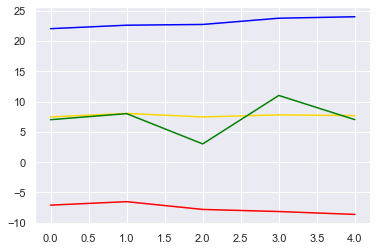

In [289]:
forecast_data = model_fit.forecast(steps=5) 

pred_y = forecast_data[0].tolist() 
test_y = df_1_test["count"].tolist()

pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [290]:
df_2 = df_day_2[:-5]
df_2_test = df_day_2[-5:]
df_2_test

,price
계약시기,
2021-03-5,1791900
2021-03-6,1494200
2021-03-7,413900
2021-03-8,1318150
2021-03-9,1178900


In [291]:
model = ARIMA(df_day_2["price"].values, order=(2,1,2))

model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  351
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5469.943
Method:                       css-mle   S.D. of innovations        1416114.383
Date:                Wed, 28 Apr 2021   AIC                          10951.886
Time:                        20:03:12   BIC                          10975.051
Sample:                             1   HQIC                         10961.105
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2204.8433    2.1e+04      0.105      0.916    -3.9e+04    4.34e+04
ar.L1.D.y     -1.0350      0.199     -5.196      0.000      -1.425      -0.645
ar.L2.D.y     -0.2963      0.084     -3.522      0.0

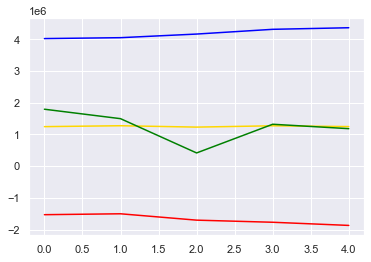

In [292]:
forecast_data = model_fit.forecast(steps=5) 

pred_y = forecast_data[0].tolist() 
test_y = df_2_test["price"].tolist()

pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

AttributeError: 'DataFrame' object has no attribute 'tolist'

## keras

In [134]:
dataset = df_day_1.values
training_data_len = math.ceil(len(dataset) * .8)
print(training_data_len)

282


In [135]:
dataset = dataset.reshape(-1,1)

In [137]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02857143],
       [0.08571429],
       [0.04285714],
       [0.07142857],
       [0.14285714],
       [0.05714286],
       [0.02857143],
       [0.08571429],
       [0.14285714],
       [0.12857143],
       [0.        ],
       [0.05714286],
       [0.04285714],
       [0.07142857],
       [0.07142857],
       [0.02857143],
       [0.07142857],
       [0.14285714],
       [0.02857143],
       [0.07142857],
       [0.01428571],
       [0.12857143],
       [0.02857143],
       [0.04285714],
       [0.1       ],
       [0.        ],
       [0.04285714],
       [0.05714286],
       [0.02857143],
       [0.02857143],
       [0.07142857],
       [0.        ],
       [0.21428571],
       [0.08571429],
       [0.14285714],
       [0.12857143],
       [0.12857143],
       [0.22857143],
       [0.04285714],
       [0.12857143],
       [0.17142857],
       [0.07142857],
       [0.18571429],
       [0.02857143],
       [0.21428571],
       [0.32857143],
       [0.        ],
       [0.171

In [138]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02857143],
       [0.08571429],
       [0.04285714],
       [0.07142857],
       [0.14285714],
       [0.05714286],
       [0.02857143],
       [0.08571429],
       [0.14285714],
       [0.12857143],
       [0.        ],
       [0.05714286],
       [0.04285714],
       [0.07142857],
       [0.07142857],
       [0.02857143],
       [0.07142857],
       [0.14285714],
       [0.02857143],
       [0.07142857],
       [0.01428571],
       [0.12857143],
       [0.02857143],
       [0.04285714],
       [0.1       ],
       [0.        ],
       [0.04285714],
       [0.05714286],
       [0.02857143],
       [0.02857143],
       [0.07142857],
       [0.        ],
       [0.21428571],
       [0.08571429],
       [0.14285714],
       [0.12857143],
       [0.12857143],
       [0.22857143],
       [0.04285714],
       [0.12857143],
       [0.17142857],
       [0.07142857],
       [0.18571429],
       [0.02857143],
       [0.21428571],
       [0.32857143],
       [0.        ],
       [0.171

In [139]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
print(len(train_data))
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print()
        print(y_train)
        print()

282
[array([0.02857143, 0.08571429, 0.04285714, 0.07142857, 0.14285714,
       0.05714286, 0.02857143, 0.08571429, 0.14285714, 0.12857143,
       0.        , 0.05714286, 0.04285714, 0.07142857, 0.07142857,
       0.02857143, 0.07142857, 0.14285714, 0.02857143, 0.07142857,
       0.01428571, 0.12857143, 0.02857143, 0.04285714, 0.1       ,
       0.        , 0.04285714, 0.05714286, 0.02857143, 0.02857143,
       0.07142857, 0.        , 0.21428571, 0.08571429, 0.14285714,
       0.12857143, 0.12857143, 0.22857143, 0.04285714, 0.12857143,
       0.17142857, 0.07142857, 0.18571429, 0.02857143, 0.21428571,
       0.32857143, 0.        , 0.17142857, 0.08571429, 0.17142857,
       0.21428571, 0.5       , 0.27142857, 0.05714286, 0.11428571,
       0.11428571, 0.1       , 0.17142857, 0.15714286, 0.2       ])]

[0.1857142857142857]

[array([0.02857143, 0.08571429, 0.04285714, 0.07142857, 0.14285714,
       0.05714286, 0.02857143, 0.08571429, 0.14285714, 0.12857143,
       0.        , 0.05714286, 

In [141]:
# Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [142]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(222, 60, 1)

In [170]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(20, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(20, return_sequences = False))
model.add(Dense(10))
model.add(Dense(1))

In [171]:
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [172]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

222/222 [==============================] - 5s 12ms/step - loss: 0.0224


In [173]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
# Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [174]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [175]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [176]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [177]:
# Get teh root mena squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2) # 50: 4.xx, 30: 2.45
rmse

1.361604949406215

C:\Riot Games\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


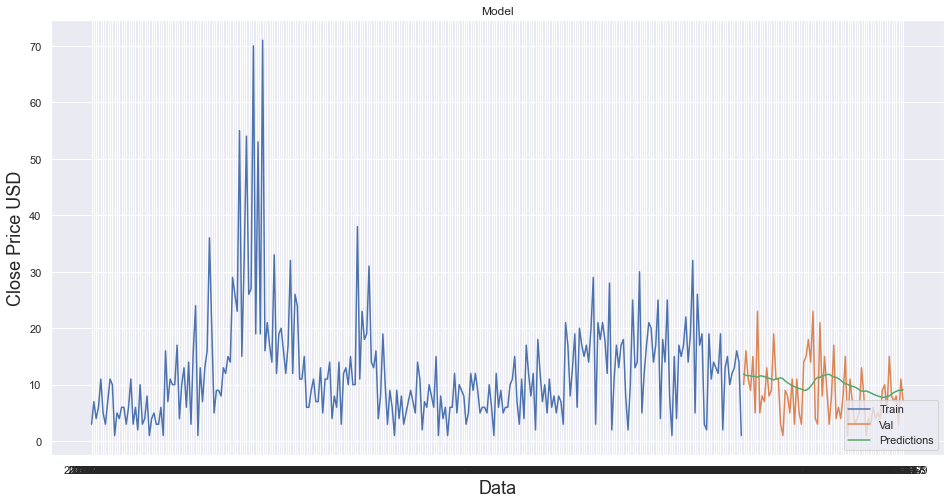

In [178]:
# Plot the data
train = df_day_1[:training_data_len]
valid = df_day_1[training_data_len:]
valid["Predictions"] = predictions
# Visualize the data
plt.figure(figsize =(16, 8))
plt.title("Model")
plt.plot(train["count"])
plt.plot(valid[["count", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

## 시간에 따른 하루 당 부동산 거래 금액 누계

#### 거래금액 "," 제거 후 data type int형으로 변환

In [112]:
df_day_2 = pd.DataFrame(df.groupby(["계약시기"])["price"].sum())
df_day_2

,price
계약시기,
2020-03-31,405000
2020-04-1,567500
2020-04-10,670300
2020-04-11,1206000
2020-04-13,2702000
...,...
2021-03-5,1791900
2021-03-6,1494200
2021-03-7,413900


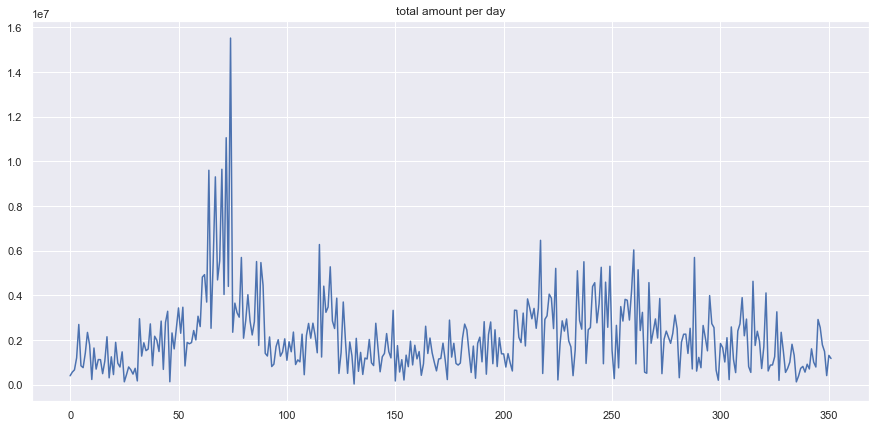

In [77]:
plt.figure(figsize=(15, 7))
plt.plot(df_day_2.values)
plt.title('total amount per day')

plt.show()

보완할 사항: x축에 시간 정보가 잘 나오게 그래프
분석할 항목: 장소로 groupby, 

In [90]:
df_day_2
dataset = df_day_2.values
training_data_len = math.ceil(len(dataset) * .8)
print(training_data_len)

282


In [91]:
dataset = dataset.reshape(-1,1)

In [92]:
dataset

array([[  405000],
       [  567500],
       [  670300],
       [ 1206000],
       [ 2702000],
       [  853800],
       [  769000],
       [ 1416500],
       [ 2347000],
       [ 1787000],
       [  240000],
       [ 1648850],
       [  704500],
       [ 1131000],
       [ 1127500],
       [  500000],
       [ 1058500],
       [ 2152000],
       [  313600],
       [ 1254500],
       [  459000],
       [ 1902400],
       [  965000],
       [  798500],
       [ 1475500],
       [  135000],
       [  454900],
       [  800000],
       [  674000],
       [  480500],
       [  739700],
       [  175000],
       [ 2958700],
       [ 1287100],
       [ 1881500],
       [ 1530000],
       [ 1601800],
       [ 2727700],
       [  858500],
       [ 2175000],
       [ 1996250],
       [ 1490000],
       [ 2853700],
       [  691000],
       [ 2795000],
       [ 3293200],
       [  137000],
       [ 2323320],
       [ 1608500],
       [ 2522500],
       [ 3443000],
       [ 2308763],
       [ 347

In [93]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02376878],
       [0.03426166],
       [0.04089961],
       [0.07549058],
       [0.1720896 ],
       [0.05274849],
       [0.04727282],
       [0.08908289],
       [0.1491667 ],
       [0.11300664],
       [0.01311448],
       [0.10408609],
       [0.04310796],
       [0.07064772],
       [0.07042172],
       [0.02990308],
       [0.06596628],
       [0.13657525],
       [0.01786694],
       [0.0786223 ],
       [0.02725565],
       [0.1204582 ],
       [0.05992884],
       [0.04917768],
       [0.09289261],
       [0.00633447],
       [0.0269909 ],
       [0.04927454],
       [0.04113853],
       [0.02864393],
       [0.04538088],
       [0.00891733],
       [0.18866511],
       [0.08072733],
       [0.11910865],
       [0.09641176],
       [0.101048  ],
       [0.17374909],
       [0.05305197],
       [0.1380604 ],
       [0.12651824],
       [0.0938289 ],
       [0.1818851 ],
       [0.04223624],
       [0.17809475],
       [0.21026429],
       [0.00646361],
       [0.147

In [94]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
print(len(train_data))
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print()
        print(y_train)
        print()

282
[array([0.02376878, 0.03426166, 0.04089961, 0.07549058, 0.1720896 ,
       0.05274849, 0.04727282, 0.08908289, 0.1491667 , 0.11300664,
       0.01311448, 0.10408609, 0.04310796, 0.07064772, 0.07042172,
       0.02990308, 0.06596628, 0.13657525, 0.01786694, 0.0786223 ,
       0.02725565, 0.1204582 , 0.05992884, 0.04917768, 0.09289261,
       0.00633447, 0.0269909 , 0.04927454, 0.04113853, 0.02864393,
       0.04538088, 0.00891733, 0.18866511, 0.08072733, 0.11910865,
       0.09641176, 0.101048  , 0.17374909, 0.05305197, 0.1380604 ,
       0.12651824, 0.0938289 , 0.1818851 , 0.04223624, 0.17809475,
       0.21026429, 0.00646361, 0.14763765, 0.10148063, 0.16049901,
       0.21993711, 0.14669768, 0.22195174, 0.05211569, 0.12020637,
       0.11630625, 0.11978666, 0.154623  , 0.12739318, 0.1959165 ])]

[0.1659811321973048]

[array([0.02376878, 0.03426166, 0.04089961, 0.07549058, 0.1720896 ,
       0.05274849, 0.04727282, 0.08908289, 0.1491667 , 0.11300664,
       0.01311448, 0.10408609, 

In [95]:
# Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [96]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(222, 60, 1)

In [218]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [219]:
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [220]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

222/222 [==============================] - 5s 14ms/step - loss: 0.0218


In [221]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
# Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [222]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [223]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [224]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [225]:
# Get teh root mena squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

13910.51791141709

In [226]:
train

,price
계약시기,
2020-03-31,405000
2020-04-1,567500
2020-04-10,670300
2020-04-11,1206000
2020-04-13,2702000
...,...
2021-01-20,1857600
2021-01-21,2304100
2021-01-22,3123300


C:\Riot Games\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


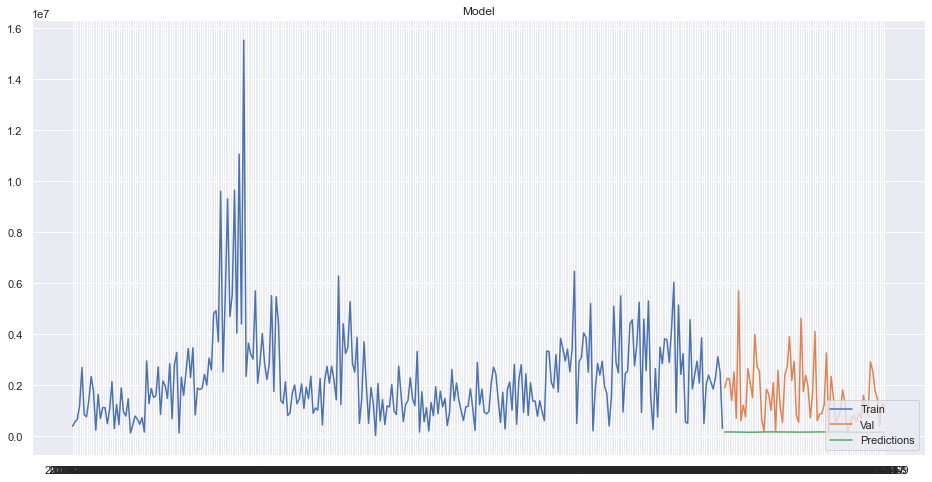

In [227]:
# Plot the data
train = df_day_2[:training_data_len]
valid = df_day_2[training_data_len:]
valid["Predictions"] = predictions
# Visualize the data
plt.figure(figsize =(16, 8))
plt.title("Model")
plt.plot(train["price"])
plt.plot(valid[["price", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

## 하루 평균 거래 금액

In [238]:
df_day_3 = pd.DataFrame(df.groupby(["계약시기"])["price"].mean())
df_day_3

,price
계약시기,
2020-03-31,135000.000000
2020-04-1,81071.428571
2020-04-10,167575.000000
2020-04-11,201000.000000
2020-04-13,245636.363636
...,...
2021-03-5,255985.714286
2021-03-6,186775.000000
2021-03-7,137966.666667


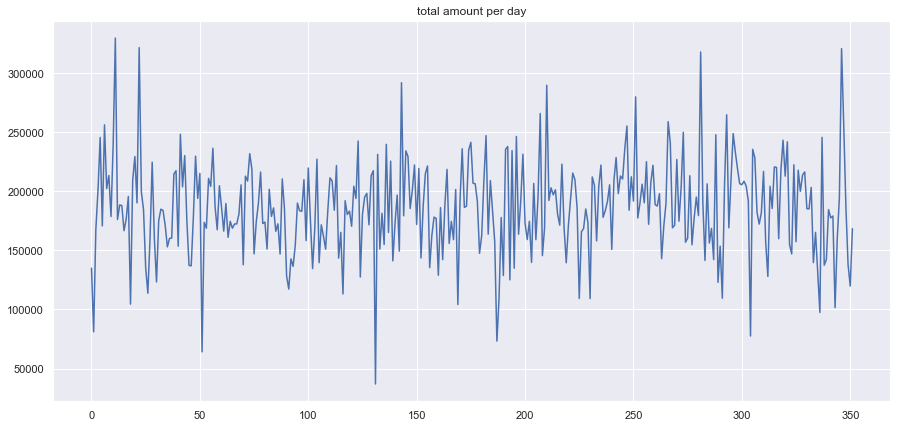

In [239]:
plt.figure(figsize=(15, 7))
plt.plot(df_day_3.values)
plt.title('total amount per day')

plt.show()

In [240]:
dataset = df_day_3.values
training_data_len = math.ceil(len(dataset) * .8)
print(training_data_len)

282


In [241]:
dataset = dataset.reshape(-1,1)

In [242]:
dataset

array([[135000.        ],
       [ 81071.42857143],
       [167575.        ],
       [201000.        ],
       [245636.36363636],
       [170760.        ],
       [256333.33333333],
       [202357.14285714],
       [213363.63636364],
       [178700.        ],
       [240000.        ],
       [329770.        ],
       [176125.        ],
       [188500.        ],
       [187916.66666667],
       [166666.66666667],
       [176416.66666667],
       [195636.36363636],
       [104533.33333333],
       [209083.33333333],
       [229500.        ],
       [190240.        ],
       [321666.66666667],
       [199625.        ],
       [184437.5       ],
       [135000.        ],
       [113725.        ],
       [160000.        ],
       [224666.66666667],
       [160166.66666667],
       [123283.33333333],
       [175000.        ],
       [184918.75      ],
       [183871.42857143],
       [171045.45454545],
       [153000.        ],
       [160180.        ],
       [160452.94117647],
       [2146

In [243]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.3349609 ],
       [0.15082265],
       [0.44618773],
       [0.56031686],
       [0.71272702],
       [0.45706286],
       [0.74925166],
       [0.56495081],
       [0.60253231],
       [0.48417387],
       [0.69348175],
       [1.        ],
       [0.47538157],
       [0.51763581],
       [0.51564403],
       [0.44308624],
       [0.47637746],
       [0.54200281],
       [0.23093295],
       [0.58791728],
       [0.65762967],
       [0.52357701],
       [0.9723313 ],
       [0.55562195],
       [0.50376447],
       [0.3349609 ],
       [0.26231775],
       [0.42032301],
       [0.64112632],
       [0.42089209],
       [0.29495453],
       [0.47154027],
       [0.50540769],
       [0.50183163],
       [0.45803754],
       [0.39642162],
       [0.42093762],
       [0.42186957],
       [0.60683921],
       [0.61665585],
       [0.39832585],
       [0.72193578],
       [0.56999937],
       [0.66047507],
       [0.47047325],
       [0.34252968],
       [0.34178987],
       [0.484

In [244]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
print(len(train_data))
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print()
        print(y_train)
        print()

282
[array([0.3349609 , 0.15082265, 0.44618773, 0.56031686, 0.71272702,
       0.45706286, 0.74925166, 0.56495081, 0.60253231, 0.48417387,
       0.69348175, 1.        , 0.47538157, 0.51763581, 0.51564403,
       0.44308624, 0.47637746, 0.54200281, 0.23093295, 0.58791728,
       0.65762967, 0.52357701, 0.9723313 , 0.55562195, 0.50376447,
       0.3349609 , 0.26231775, 0.42032301, 0.64112632, 0.42089209,
       0.29495453, 0.47154027, 0.50540769, 0.50183163, 0.45803754,
       0.39642162, 0.42093762, 0.42186957, 0.60683921, 0.61665585,
       0.39832585, 0.72193578, 0.56999937, 0.66047507, 0.47047325,
       0.34252968, 0.34178987, 0.48423165, 0.65860523, 0.5365468 ,
       0.60875986, 0.09298428, 0.46713559, 0.45037047, 0.59427201,
       0.57135703, 0.68153105, 0.51264541, 0.44587473, 0.57306427])]

[0.5099288323927242]

[array([0.3349609 , 0.15082265, 0.44618773, 0.56031686, 0.71272702,
       0.45706286, 0.74925166, 0.56495081, 0.60253231, 0.48417387,
       0.69348175, 1.        , 

In [245]:
# Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [246]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(222, 60, 1)

In [248]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(30, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(30, return_sequences = False))
model.add(Dense(20))
model.add(Dense(1))

In [249]:
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [250]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

222/222 [==============================] - 5s 12ms/step - loss: 0.0323


In [251]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
# Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [252]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [253]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [254]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [255]:
# Get teh root mena squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

20024.932420345664

C:\Riot Games\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


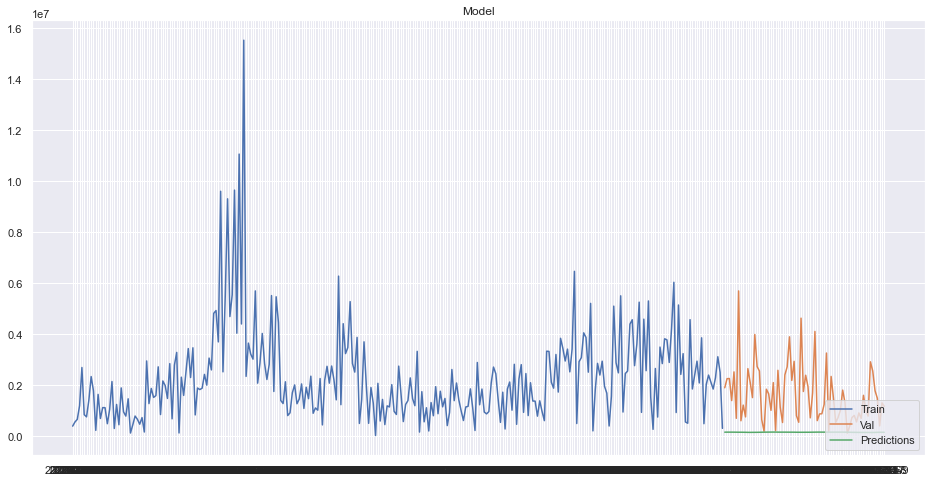

In [256]:
# Plot the data
train = df_day_2[:training_data_len]
valid = df_day_2[training_data_len:]
valid["Predictions"] = predictions
# Visualize the data
plt.figure(figsize =(16, 8))
plt.title("Model")
plt.plot(train["price"])
plt.plot(valid[["price", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

In [259]:
for step in range(100):
    step = tf.convert_to_tensor(step, dtype=tf.int64)
    my_func(step)
    writer.flush()

NameError: name 'my_func' is not defined